In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
df_BTC = pd.read_csv('BTC-all-data.csv')

In [4]:
df_BTC.head()

,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,open_timestamp,close_timestamp
0,"05/24/2023, 23:00:00","05/24/2023, 23:59:59",26348.52,26394.16,26318.25,26329.01,712.51394,18778933.16,16479,376.83127,9.932271e+06,0,1.684970e+12,1.684970e+12
1,"05/24/2023, 22:00:00","05/24/2023, 22:59:59",26368.66,26406.00,26313.47,26348.52,746.24121,19670396.24,19907,325.98884,8.592227e+06,0,1.684970e+12,1.684970e+12
2,"05/24/2023, 21:00:00","05/24/2023, 21:59:59",26404.18,26464.65,26310.48,26368.66,1223.45586,32298325.57,27225,642.68037,1.696504e+07,0,1.684960e+12,1.684970e+12
3,"05/24/2023, 20:00:00","05/24/2023, 20:59:59",26252.34,26486.46,26242.62,26404.18,2878.77545,75937036.88,47336,1539.53932,4.060586e+07,0,1.684960e+12,1.684960e+12
4,"05/24/2023, 19:00:00","05/24/2023, 19:59:59",26220.55,26397.64,26201.67,26252.33,2349.96235,61795762.11,40509,1171.28517,3.080221e+07,0,1.684950e+12,1.684960e+12


In [5]:
df_BTC['open_time']

0        05/24/2023, 23:00:00
1        05/24/2023, 22:00:00
2        05/24/2023, 21:00:00
3        05/24/2023, 20:00:00
4        05/24/2023, 19:00:00
                 ...         
20957    01/01/2021, 04:00:00
20958    01/01/2021, 03:00:00
20959    01/01/2021, 02:00:00
20960    01/01/2021, 01:00:00
20961    01/01/2021, 00:00:00
Name: open_time, Length: 20962, dtype: object

In [6]:
df_BTC['datetime'] = df_BTC['open_time'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y, %H:%M:%S"))

In [7]:
df_BTC['year'] = df_BTC['datetime'].apply(lambda x: x.year)
df_BTC['month'] = df_BTC['datetime'].apply(lambda x: x.month)
df_BTC['day'] = df_BTC['datetime'].apply(lambda x: x.day)
df_BTC['day_of_week'] = df_BTC['datetime'].apply(lambda x: x.weekday())

In [8]:
df_BTC.head()

,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,open_timestamp,close_timestamp,datetime,year,month,day,day_of_week
0,"05/24/2023, 23:00:00","05/24/2023, 23:59:59",26348.52,26394.16,26318.25,26329.01,712.51394,18778933.16,16479,376.83127,9.932271e+06,0,1.684970e+12,1.684970e+12,2023-05-24 23:00:00,2023,5,24,2
1,"05/24/2023, 22:00:00","05/24/2023, 22:59:59",26368.66,26406.00,26313.47,26348.52,746.24121,19670396.24,19907,325.98884,8.592227e+06,0,1.684970e+12,1.684970e+12,2023-05-24 22:00:00,2023,5,24,2
2,"05/24/2023, 21:00:00","05/24/2023, 21:59:59",26404.18,26464.65,26310.48,26368.66,1223.45586,32298325.57,27225,642.68037,1.696504e+07,0,1.684960e+12,1.684970e+12,2023-05-24 21:00:00,2023,5,24,2
3,"05/24/2023, 20:00:00","05/24/2023, 20:59:59",26252.34,26486.46,26242.62,26404.18,2878.77545,75937036.88,47336,1539.53932,4.060586e+07,0,1.684960e+12,1.684960e+12,2023-05-24 20:00:00,2023,5,24,2
4,"05/24/2023, 19:00:00","05/24/2023, 19:59:59",26220.55,26397.64,26201.67,26252.33,2349.96235,61795762.11,40509,1171.28517,3.080221e+07,0,1.684950e+12,1.684960e+12,2023-05-24 19:00:00,2023,5,24,2


In [9]:
df_BTC.dtypes

open_time                               object
close_time                              object
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
quote_asset_volume                     float64
num_trades                               int64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
ignore                                   int64
open_timestamp                         float64
close_timestamp                        float64
datetime                        datetime64[ns]
year                                     int64
month                                    int64
day                                      int64
day_of_week                              int64
dtype: object

In [10]:
df_BTC = df_BTC.sort_values('datetime', ascending = True)

In [11]:
df_BTC['change_close'] = - (df_BTC['close'].shift(1) - df_BTC['close'])

In [12]:
df_BTC.head()

,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,open_timestamp,close_timestamp,datetime,year,month,day,day_of_week,change_close
20961,"01/01/2021, 00:00:00","01/01/2021, 00:59:59",28923.63,29031.34,28690.17,28995.13,2311.811445,6.676883e+07,58389,1215.359238,35103542.78,0,1.609460e+12,1.609460e+12,2021-01-01 00:00:00,2021,1,1,4,NaN
20960,"01/01/2021, 01:00:00","01/01/2021, 01:59:59",28995.13,29470.00,28960.35,29409.99,5403.068471,1.583578e+08,103896,3160.041701,92613991.94,0,1.609460e+12,1.609470e+12,2021-01-01 01:00:00,2021,1,1,4,414.86
20959,"01/01/2021, 02:00:00","01/01/2021, 02:59:59",29410.00,29465.26,29120.03,29194.65,2384.231560,6.984265e+07,57646,1203.433506,35252749.91,0,1.609470e+12,1.609470e+12,2021-01-01 02:00:00,2021,1,1,4,-215.34
20958,"01/01/2021, 03:00:00","01/01/2021, 03:59:59",29195.25,29367.00,29150.02,29278.40,1461.345077,4.276078e+07,42510,775.915666,22705547.98,0,1.609470e+12,1.609470e+12,2021-01-01 03:00:00,2021,1,1,4,83.75
20957,"01/01/2021, 04:00:00","01/01/2021, 04:59:59",29278.41,29395.00,29029.40,29220.31,2038.046803,5.961464e+07,55414,1003.342834,29346381.88,0,1.609470e+12,1.609480e+12,2021-01-01 04:00:00,2021,1,1,4,-58.09


In [13]:
df_BTC = df_BTC.drop('ignore', axis =1)

In [14]:
df_BTC.tail()

,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,open_timestamp,close_timestamp,datetime,year,month,day,day_of_week,change_close
4,"05/24/2023, 19:00:00","05/24/2023, 19:59:59",26220.55,26397.64,26201.67,26252.33,2349.96235,61795762.11,40509,1171.28517,3.080221e+07,1.684950e+12,1.684960e+12,2023-05-24 19:00:00,2023,5,24,2,31.78
3,"05/24/2023, 20:00:00","05/24/2023, 20:59:59",26252.34,26486.46,26242.62,26404.18,2878.77545,75937036.88,47336,1539.53932,4.060586e+07,1.684960e+12,1.684960e+12,2023-05-24 20:00:00,2023,5,24,2,151.85
2,"05/24/2023, 21:00:00","05/24/2023, 21:59:59",26404.18,26464.65,26310.48,26368.66,1223.45586,32298325.57,27225,642.68037,1.696504e+07,1.684960e+12,1.684970e+12,2023-05-24 21:00:00,2023,5,24,2,-35.52
1,"05/24/2023, 22:00:00","05/24/2023, 22:59:59",26368.66,26406.00,26313.47,26348.52,746.24121,19670396.24,19907,325.98884,8.592227e+06,1.684970e+12,1.684970e+12,2023-05-24 22:00:00,2023,5,24,2,-20.14
0,"05/24/2023, 23:00:00","05/24/2023, 23:59:59",26348.52,26394.16,26318.25,26329.01,712.51394,18778933.16,16479,376.83127,9.932271e+06,1.684970e+12,1.684970e+12,2023-05-24 23:00:00,2023,5,24,2,-19.51


In [15]:
corr_matrix = df_BTC.corr()

In [ ]:
# sn.heatmap(corr_matrix, annot=True)
# plt.show()

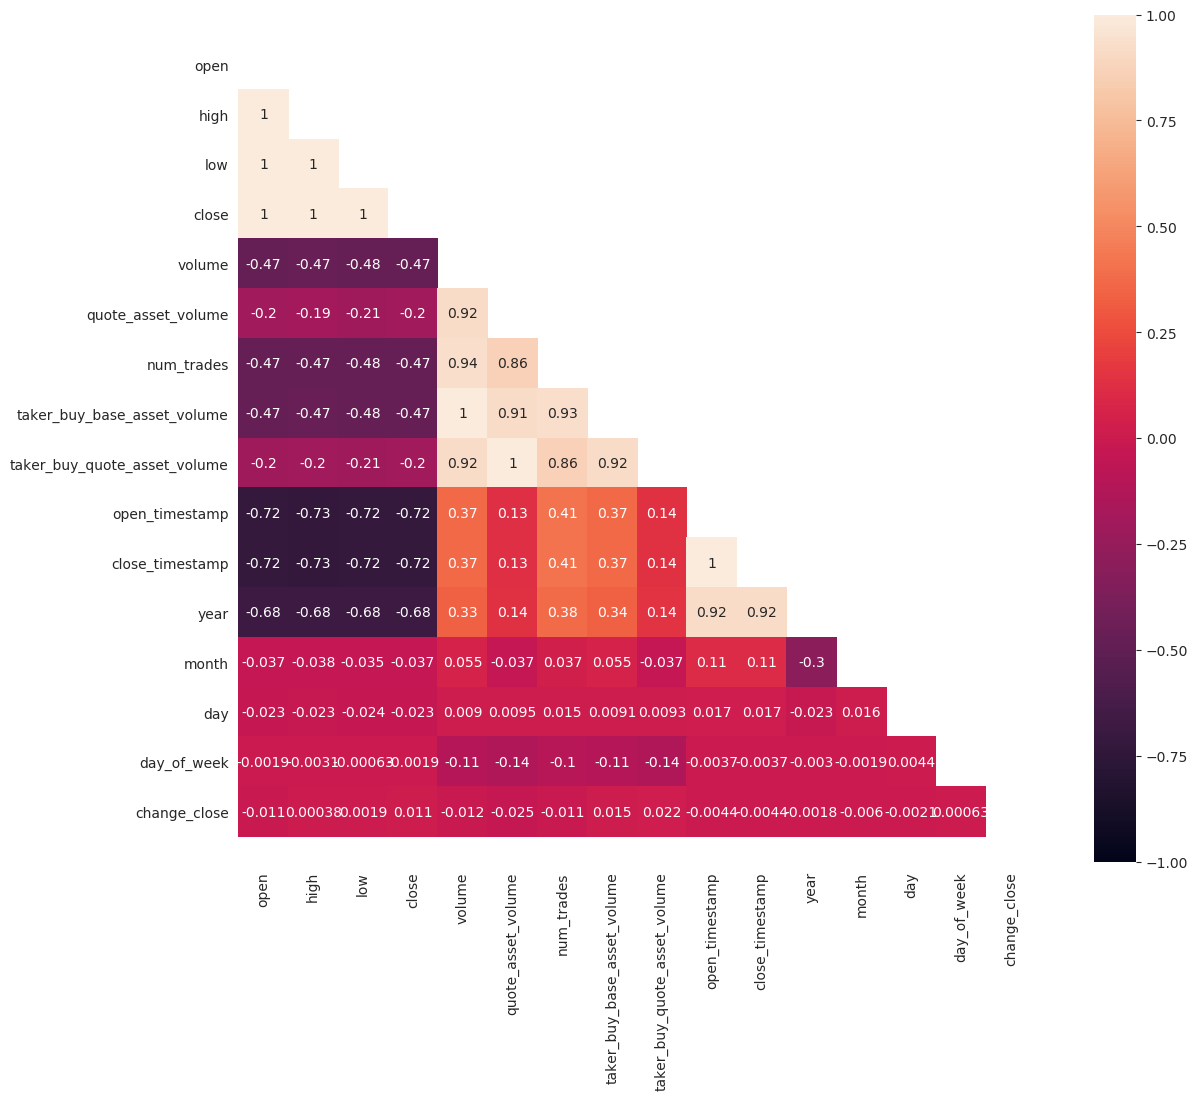

In [16]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sn.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 11))
    ax = sn.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin= -1.0, square=True, annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plt.show()

### Load Twitter data

In [17]:
df_tweet = pd.read_csv('BTC_tweets_cleaned.csv')
df_tweet.head()

,year,month,day,day_of_week,text,timestamp,sentiment
0,2023,5,20,5,Today's Sophia BTC Mood: Bearish #Crypto #Cryp...,2023-05-20T00:00:00Z,NEUTRAL
1,2023,5,20,5,"App Development On Bitcoin?, Beeple Bitboy NFT...",2023-05-20T00:00:00Z,NEUTRAL
2,2023,5,20,5,PREÇO BITCOIN BRASIL (BTCBRL)\nValor: R$ 134.8...,2023-05-20T00:00:00Z,NEUTRAL
3,2023,5,20,5,"$BTC Price: $26,875 \n#Bitcoin #BTC #BitcoinPr...",2023-05-20T00:00:00Z,NEUTRAL
4,2023,5,20,5,#Bitcoin #Crypto #Blockchain #Cryptocurrency #...,2023-05-20T01:00:00Z,NEUTRAL


In [18]:
df_tweet_senti = pd.get_dummies(df_tweet.sentiment, prefix='Sentiment')
# df_tweet_senti.shape
df_tweet = df_tweet.join(df_tweet_senti)
df_tweet.shape


(622, 10)

In [19]:
df_tweet_agg = df_tweet.groupby(['year','month','day']).agg({'Sentiment_NEGATIVE':'sum','Sentiment_NEUTRAL':'sum',
                                                            'Sentiment_POSITIVE':'sum'}).reset_index()

df_tweet_agg.head(2)

,year,month,day,Sentiment_NEGATIVE,Sentiment_NEUTRAL,Sentiment_POSITIVE
0,2023,5,20,2,97,0
1,2023,5,21,2,82,0


In [20]:
df_tweet_agg.shape

(5, 6)

In [21]:
df_BTC.shape

(20962, 19)

In [31]:
df_joined = pd.merge(df_BTC, df_tweet_agg, how='left', on=['year','month','day'])

df_joined.shape

(20962, 23)

In [32]:
df_joined.head(2)

,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,...,datetime,year,month,day,day_of_week,change_open,VolperTrade,Sentiment_NEGATIVE,Sentiment_NEUTRAL,Sentiment_POSITIVE
0,"01/01/2021, 00:00:00","01/01/2021, 00:59:59",28923.63,29031.34,28690.17,28995.13,2311.811445,6.676883e+07,58389,1215.359238,...,2021-01-01 00:00:00,2021,1,1,4,NaN,0.039593,NaN,NaN,NaN
1,"01/01/2021, 01:00:00","01/01/2021, 01:59:59",28995.13,29470.00,28960.35,29409.99,5403.068471,1.583578e+08,103896,3160.041701,...,2021-01-01 01:00:00,2021,1,1,4,71.5,0.052005,NaN,NaN,NaN


In [33]:
#filter for the days twitter data is avialable
df_filter = df_joined[df_joined['datetime'] >= datetime.datetime(2023, 5, 20)]

In [34]:
df_filter.dtypes

open_time                               object
close_time                              object
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
quote_asset_volume                     float64
num_trades                               int64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
open_timestamp                         float64
close_timestamp                        float64
datetime                        datetime64[ns]
year                                     int64
month                                    int64
day                                      int64
day_of_week                              int64
change_open                            float64
VolperTrade                            float64
Sentiment_NEGATIVE                     float64
Sentiment_NEU

In [35]:
#Aggregating the dataframe by day to find out any correlation between the tweets and the prices 

df_daily = df_filter.groupby(['day','month','year','day_of_week']).agg({'open_time':'min',
                                                                         'close_time':'max',
                                                                         'open':'first',
                                                                         'high':'max',
                                                                         'low':'min',
                                                                         'close':'last',
                                                                         'volume':'sum',
                                                                         'num_trades':'sum',
                                                                         'open_timestamp':'min',
                                                                         'close_timestamp':'max',
                                                                         'Sentiment_NEGATIVE':'mean',
                                                                         'Sentiment_NEUTRAL':'mean',
                                                                         'Sentiment_POSITIVE':'mean'}).reset_index()


df_daily['VolperTrade'] = df_daily['volume']/df_daily['num_trades']
df_daily.head()


,day,month,year,day_of_week,open_time,close_time,open,high,low,close,volume,num_trades,open_timestamp,close_timestamp,Sentiment_NEGATIVE,Sentiment_NEUTRAL,Sentiment_POSITIVE,VolperTrade
0,20,5,2023,5,"05/20/2023, 00:00:00","05/20/2023, 23:59:59",26880.26,27150.00,26825.11,27102.43,14434.54718,481382,1.684540e+12,1.684630e+12,2.0,97.0,0.0,0.029986
1,21,5,2023,6,"05/21/2023, 00:00:00","05/21/2023, 23:59:59",27102.42,27277.55,26666.03,26747.78,21347.87279,568937,1.684630e+12,1.684710e+12,2.0,82.0,0.0,0.037522
2,22,5,2023,0,"05/22/2023, 00:00:00","05/22/2023, 23:59:59",26747.78,27099.89,26538.21,26849.27,26458.83828,717111,1.684710e+12,1.684800e+12,0.0,150.0,1.0,0.036896
3,23,5,2023,1,"05/23/2023, 00:00:00","05/23/2023, 23:59:59",26849.28,27495.83,26798.11,27219.61,38700.83858,816399,1.684800e+12,1.684890e+12,0.0,126.0,2.0,0.047404
4,24,5,2023,2,"05/24/2023, 00:00:00","05/24/2023, 23:59:59",27219.61,27219.61,26080.50,26329.01,54393.06570,1012767,1.684890e+12,1.684970e+12,1.0,159.0,0.0,0.053707


In [36]:
df_daily.columns

Index(['day', 'month', 'year', 'day_of_week', 'open_time', 'close_time',
       'open', 'high', 'low', 'close', 'volume', 'num_trades',
       'open_timestamp', 'close_timestamp', 'Sentiment_NEGATIVE',
       'Sentiment_NEUTRAL', 'Sentiment_POSITIVE', 'VolperTrade'],
      dtype='object')

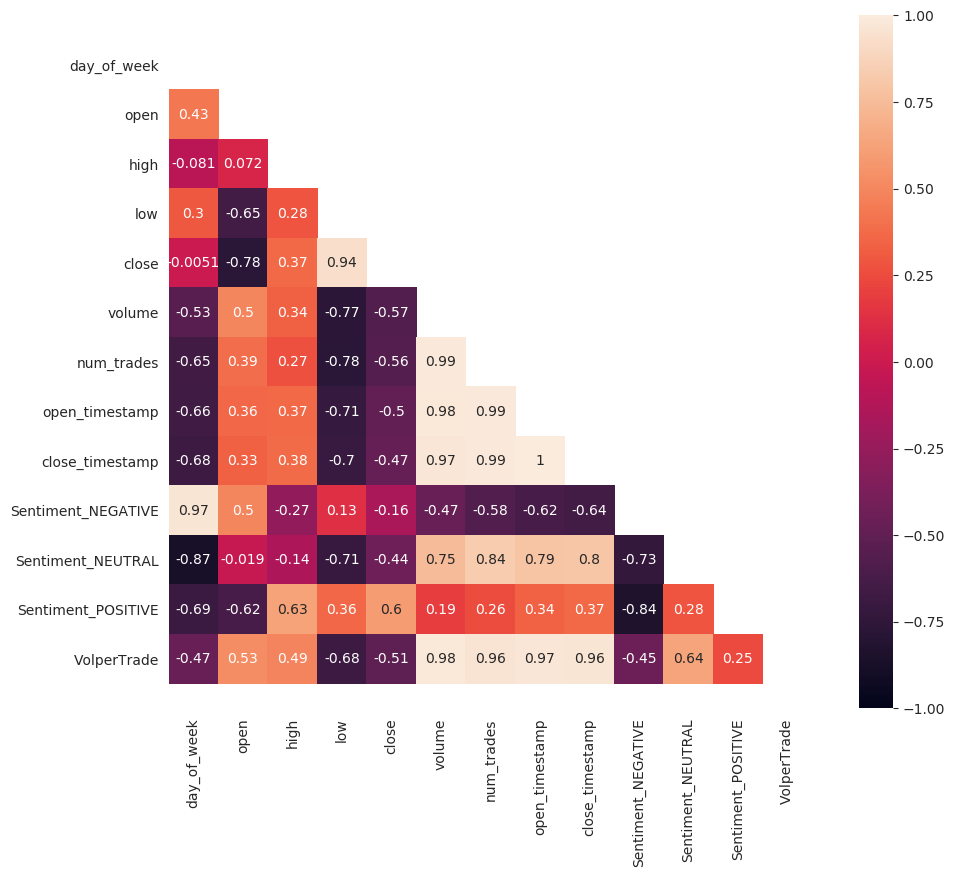

In [37]:
corr = df_daily[['day_of_week', 'open_time', 'close_time',
               'open', 'high', 'low', 'close', 'volume', 'num_trades',
               'open_timestamp', 'close_timestamp', 'Sentiment_NEGATIVE',
               'Sentiment_NEUTRAL', 'Sentiment_POSITIVE', 'VolperTrade']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sn.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 9))
    ax = sn.heatmap(corr, mask=mask, vmax=1.0, vmin= -1.0, square=True, annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plt.show()